<h1><center>Recipe Site Traffic</center></h1>

## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  confusion_matrix, classification_report


In [2]:
# Load the data
recipes = pd.read_csv('recipe_site_traffic_2212.csv')
recipes.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


In [3]:
recipes.shape

(947, 8)

## Data Validation

The data set has 947 rows and 9 columns. I have validated all the variables and have made changes after validation. Not all the columns were as described in the data dictionary.

- recipe: `947` unique numeric values without missing values, same as the description. No cleaning is needed.
- calories: Numeric values with `52` missing values. Missing values imputed with the mean.
- carbohydrate: Numeric values with `52` missing values. Missing values imputed with the mean.
- sugar: Numeric values with `52` missing values. Missing values imputed with the mean.
- protein: Numeric values with `52` missing values. Missing values imputed with the mean.
- category: `11` categories without missing values, not same as the description. Replaced `Chicken Breast` with `Chicken` to make it the `10` required types of recipes.
- servings: `Object` values without missing values. Replaced `4 as a snack`and `6 as a snack` with `4` and `6` respectively, and changed data type to numerical (int64).
- high_traffic: Character values with `373` missing values. Missing values imputed with the value `Low`.


In [4]:
# Check variable data types
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
# Check for missing values
recipes.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [6]:
recipes['high_traffic'].unique()

array(['High', nan], dtype=object)

In [7]:
# Percentage of missing values
print("Missing values for calories: {:.2f}%".format(100 * recipes['calories'].isnull().sum() / len(recipes)))
print("Missing values for high_traffic: {:.2f}%".format(100 * recipes['high_traffic'].isnull().sum() / len(recipes)))

Missing values for calories: 5.49%
Missing values for high_traffic: 39.39%


In [8]:
# Check for duplicates
recipes.duplicated().sum()

0

In [9]:
# Check for outliers
recipes.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [10]:
recipes['servings'].dtype

dtype('O')

In [11]:
recipes['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [12]:
# Handle missing values in the 'calories', 'carbohydrate', 'sugar', and 'protein' columns 
# by filling them with the mean value of that column
recipes['calories'].fillna(recipes['calories'].mean(), inplace=True)
recipes['carbohydrate'].fillna(recipes['carbohydrate'].mean(), inplace=True)
recipes['sugar'].fillna(recipes['sugar'].mean(), inplace=True)
recipes['protein'].fillna(recipes['protein'].mean(), inplace=True)

# Impute missing values in the 'high_traffic' column with 'Low'
recipes['high_traffic'].fillna(value='Low', inplace=True)

# Replace "4 as a snack" with "4" in servings 
recipes["servings"] = recipes["servings"].replace("4 as a snack", "4")

# Replace "6 as a snack" with "6" in servings 
recipes["servings"] = recipes["servings"].replace("6 as a snack", "6")

# Change the data type of 'servings' to int64
recipes['servings'] = recipes['servings'].astype('int64')

# Replace "Chicken Breast" with "Chicken" in the category column
recipes["category"] = recipes["category"].replace("Chicken Breast", "Chicken")

# Check the number of missing values in each column again to confirm that there are no more missing values
recipes.isnull().sum()


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [13]:
# confirm changes
recipes['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [14]:
# confirm changes
recipes.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low


In [15]:
# confirm changes
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


In [16]:
# confirm changes
recipes['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [17]:
#data['category'].shape[0]

In [18]:
# confirm changes
recipes['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [19]:
recipes.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low


# Exploratory Analysis

I have investigated the target variable and features of the recipes, the relationships between numerical variables, as well as the relationships between the target variable and features. After the analysis, I decided not to make any changes for now. 

## Target variable - high_traffic

Since we need to predict whether a recipe featured on Tasty Bytes' homepage will generate high traffic or not, `high_traffic` is the target variable. 

- 60.6% of the recipes lead to high traffic.

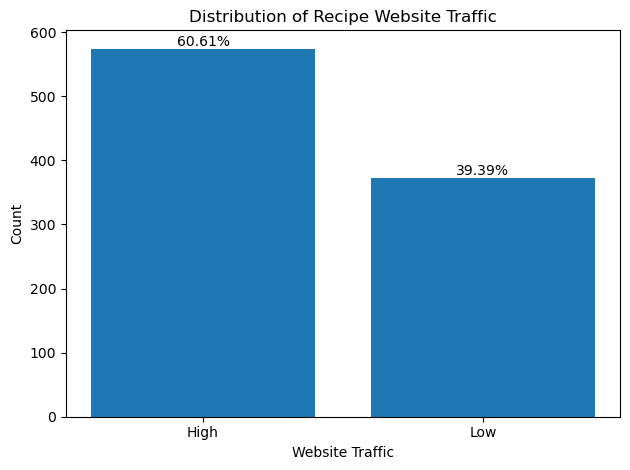

In [20]:
counts = recipes['high_traffic'].value_counts()

plt.bar(counts.index, counts.values)
plt.title('Distribution of Recipe Website Traffic')
plt.xlabel('Website Traffic')
plt.ylabel('Count')
plt.xticks(counts.index, ['High', 'Low'])  

# Adding percentage labels on top of each bar
total = counts.sum()
for i, count in enumerate(counts.values):
    percentage = (count / total) * 100
    plt.text(counts.index[i], count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Numeric variables - calories, carbohydrate, sugar, protein, servings

From the heatmap below, we can conclude that there are some weak to moderate relationships between the variable, but none of them are particularly strong. 

- There is a moderate positive relationship between `calories` and `protein`, meaning that as calories increase, protein tends to increase as well.
- There weak positive relationship between `carbohydrate` and `sugar`, meaning that as carbohydrate increases, sugar tends to increase slightly.

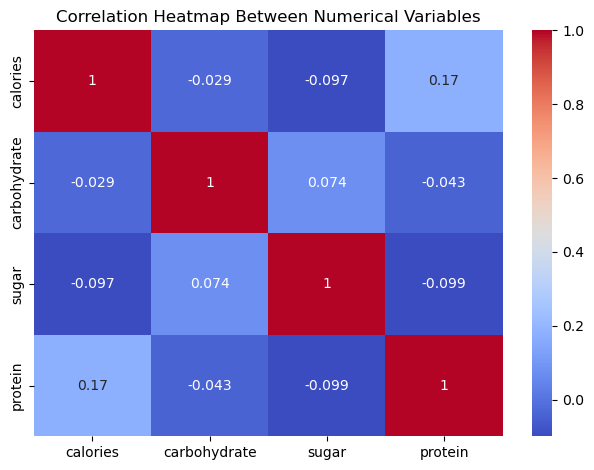

In [21]:
# Select the numerical columns
numerical_cols = ['calories', 'carbohydrate', 'sugar', 'protein']

# Create a heatmap of the numerical columns
sns.heatmap(recipes[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Numerical Variables')
plt.tight_layout()
plt.show()


#### Distribution of individual numeric variables

To demonstrate the characteristics of data, I decided to plot histograms.
From the histograms, the features are all right-skewed and non-uniformly distributed across recipes.

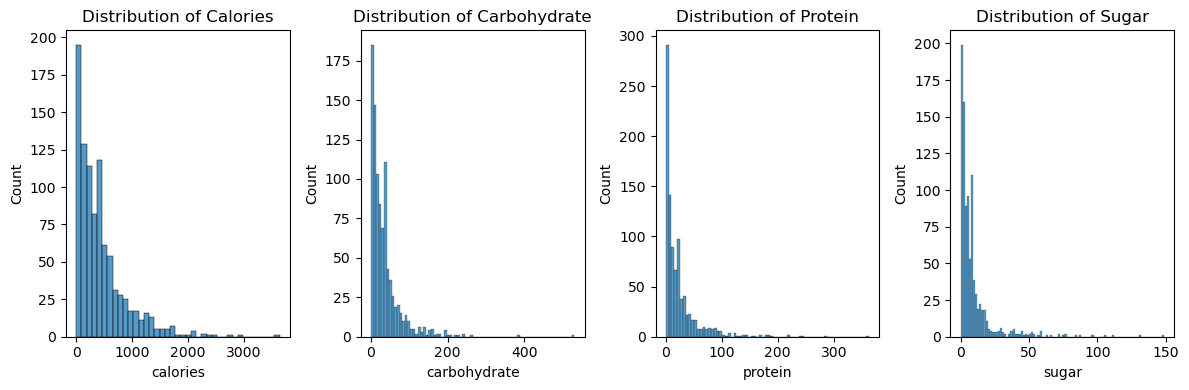

In [22]:
fig, axs = plt.subplots(ncols=4, figsize=(12, 4))

# Create histograms
sns.histplot(data=recipes, x='calories', ax=axs[0])
axs[0].set_title('Distribution of Calories')

sns.histplot(data=recipes, x='carbohydrate', ax=axs[1])
axs[1].set_title('Distribution of Carbohydrate')

sns.histplot(data=recipes, x='protein', ax=axs[2])
axs[2].set_title('Distribution of Protein')

sns.histplot(data=recipes, x='sugar', ax=axs[3])
axs[3].set_title('Distribution of Sugar')

# Show the plot
plt.tight_layout()
plt.show()

#### Relationship between calories and carbohydrate, protein, sugar as well as `high_traffic`

To further investigate the relationships within the numerical features as well as between them and the target variable, I decided to make a pairplot. From the scatterplots in the pairplot below, it is clear that there is no linear relationship between any two of these features.


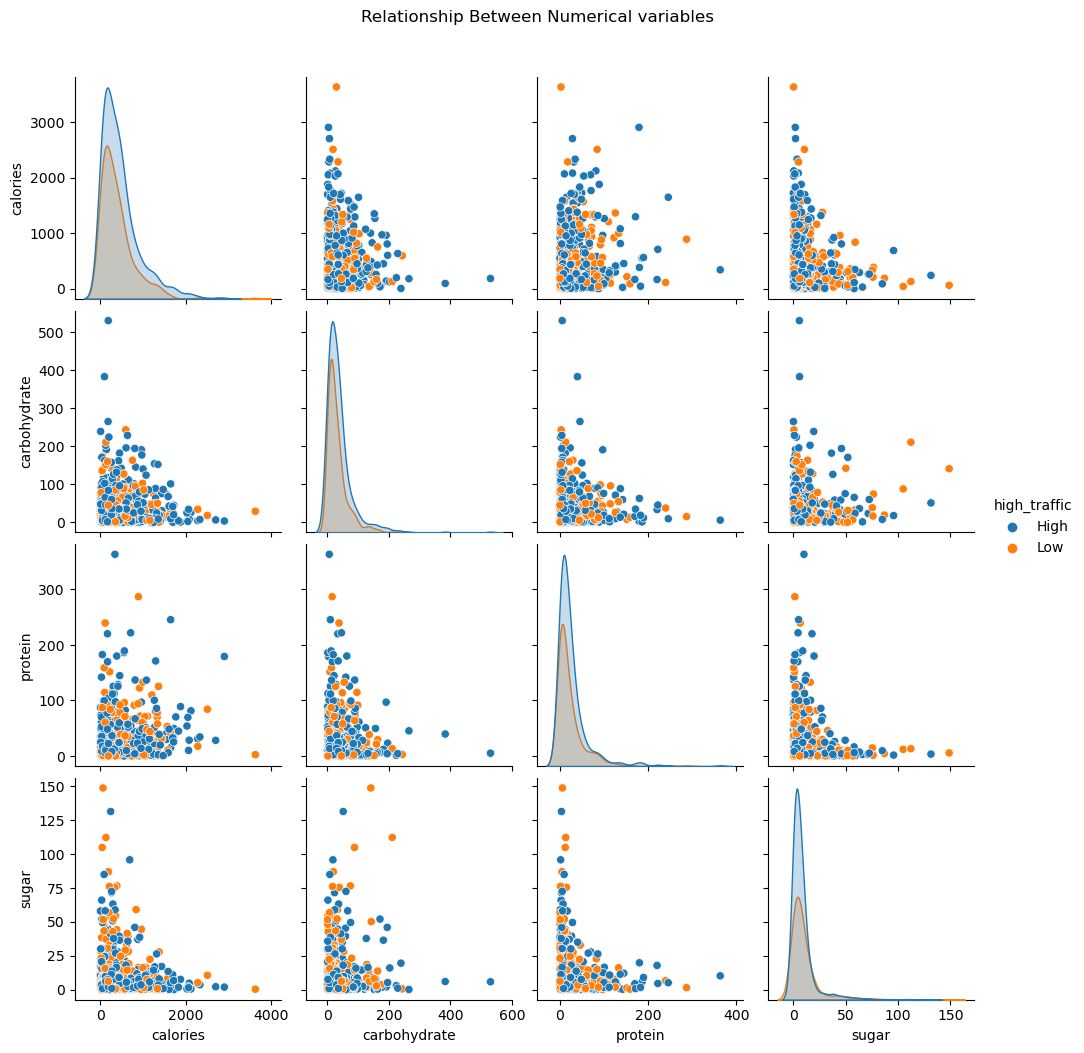

In [23]:
sns.pairplot(data=recipes, vars=['calories', 'carbohydrate', 'protein', 'sugar'], hue='high_traffic')
plt.suptitle("Relationship Between Numerical variables", y=1.05)
plt.show()

## Categorical Variables - category, high_traffic

From the bar charts and boxplots below, we can see that:
 - The most served (frequent) type of recipe is `chicken` and most recipes were served 4 times.
 - `Potato`, `Vegetable`, `Pork` and `Chicken` recipes generate high traffic the most.
 - `Beverages` generate high traffic the least.
 - `Vegetable` recipes generated the least low traffic.
 - `Beverages` contain the least calories.
 - Top 3 calorie filled categories are `Pork`, `One dish Meal` and `Meat`.


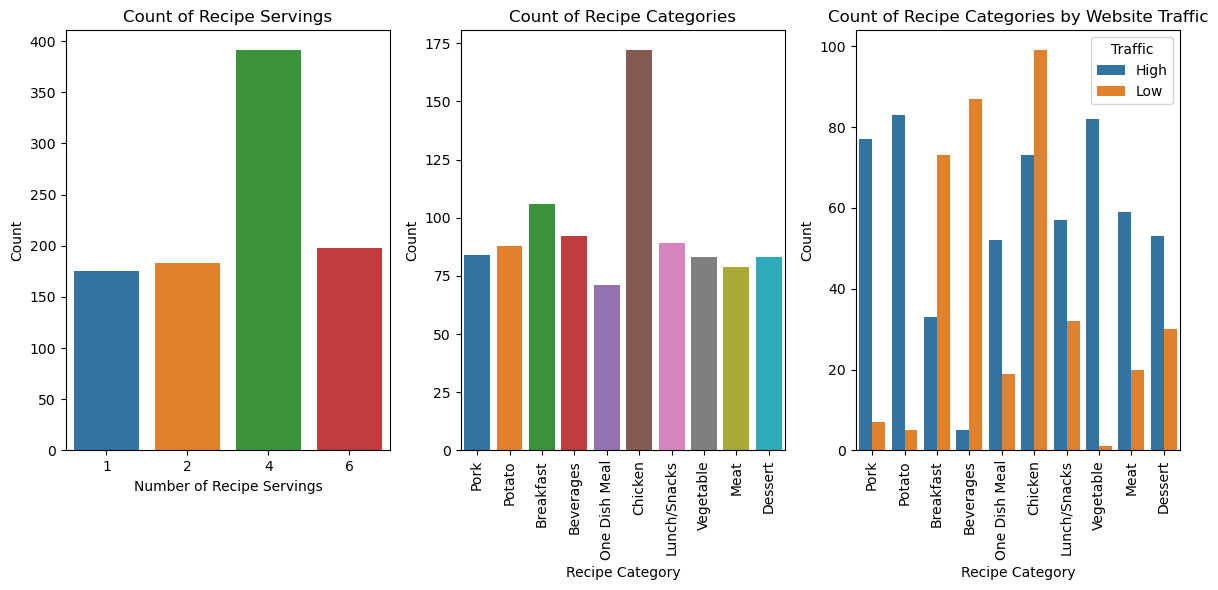

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))

# Count Recipe Servings
sns.countplot(x='servings', data=recipes, ax=axs[0])
axs[0].set_title('Count of Recipe Servings')
axs[0].set_xlabel('Number of Recipe Servings')
axs[0].set_ylabel('Count')

# Count Recipe Categories
sns.countplot(x='category',  data=recipes, ax=axs[1])
axs[1].set_title('Count of Recipe Categories')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Recipe Category')
axs[1].set_ylabel('Count')

# Count Recipe Categories by Website Traffic
sns.countplot(x='category', hue='high_traffic', data=recipes)
axs[2].set_title('Count of Recipe Categories by Website Traffic')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
axs[2].set_xlabel('Recipe Category')
axs[2].set_ylabel('Count')
axs[2].legend(title='Traffic')

plt.tight_layout()
plt.show()

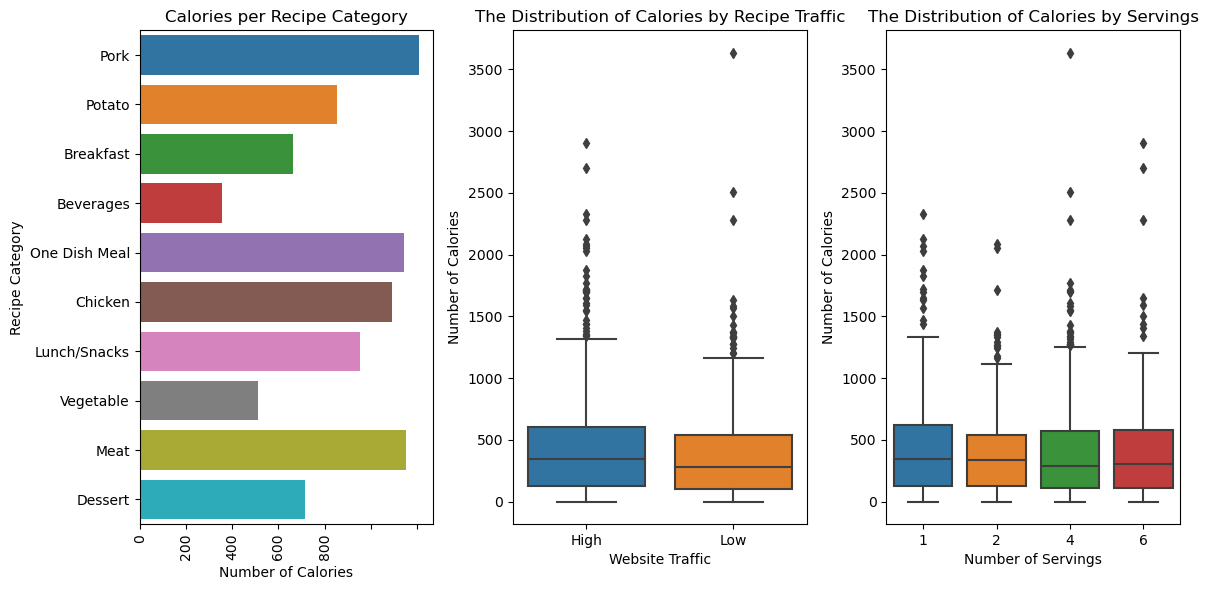

In [26]:
# Create a figure with three subplots
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))

#plt.barh(recipes['category'], recipes['calories'])
sns.barplot(x='calories', y='category', data=recipes,ci=None, ax=axs[0])
axs[0].set_title('Calories per Recipe Category')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Number of Calories')
axs[0].set_ylabel('Recipe Category')

sns.boxplot(x='high_traffic', y='calories', data=recipes, ax=axs[1])
axs[1].set_title('The Distribution of Calories by Recipe Traffic')
axs[1].set_xlabel('Website Traffic')
axs[1].set_ylabel('Number of Calories')

sns.boxplot(x='servings', y='calories', data=recipes, ax=axs[2])
axs[2].set_title('The Distribution of Calories by Servings')
axs[2].set_xlabel('Number of Servings')
axs[2].set_ylabel('Number of Calories')

plt.tight_layout()
plt.show()

# Model Developement & Evaluation

Predicting whether a recipe will lead to high traffic or not is a **binary classification machine learning problem**. I am choosing the Logistic regression model because it produces a probability estimate of the dependent variable rather than a simple binary classification, which is important here since we need to predict how likely a recipe will generate high traffic. I'm also choosing the Random Forest classification model as my comparison model because it popularly does well and is easy to interprete.

For model evaluation, I am choosing **Recall** as the best metric because we want to ensure that all positive samples are correctly predicted. That is, all high traffic generating recipes are identified.


## Data Preparation for Modelling

To enable modelling, I chose `calories`, `carbohydrate`, `sugar`, `protein`, `category`, `servings` as features, and `high_traffic` as the target variable. I also performed following changes:

- Converted categorical variables into numeric features.
- Splitted the data into a training set and a test set.
- Feature scaling.

In [27]:
recipes.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low


In [28]:
recipes['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [29]:
# Convert categorical variables to numerical
category_map = {'Pork': 0, 'Potato': 1, 'Breakfast': 2, 'Beverages': 3, 'One Dish Meal': 4,
                'Chicken': 5, 'Lunch/Snacks': 6, 'Vegetable': 7, 'Meat': 8, 'Dessert': 9}

recipes['category'] = recipes['category'].map(category_map)

# Set high traffic to 1 and low traffic to 0
recipes['high_traffic'] = recipes['high_traffic'].map({'Low': 0, 'High': 1})

In [30]:
recipes['category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# Create binary target variable y (Survived) and feature set (X)
X = recipes.drop(columns=['recipe','high_traffic'], axis=1)
y = recipes['high_traffic']

X.shape, y.shape

((947, 6), (947,))

In [32]:
# Split the data into features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression Model

In [34]:
# Create a logistic regression model
log_reg = LogisticRegression()

# Train log_rg model on the training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
# Make predictions on test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the performance of the model
lr_acc = accuracy_score(y_test, y_pred_log_reg)
lr_pr = precision_score(y_test, y_pred_log_reg)
lr_rc = recall_score(y_test, y_pred_log_reg)
#lr_f1 = f1_score(y_test, y_pred_log_reg)

print('Logistic Regression Accuracy: {:.2f}'.format(lr_acc))
print('Logistic Regression Precision: {:.2f}'.format(lr_pr))
print('Logistic Regression Recall: {:.2f}'.format(lr_rc))
#print('Logistic Regression F1 Score: {:.2f}'.format(lr_f1))


Logistic Regression Accuracy: 0.59
Logistic Regression Precision: 0.59
Logistic Regression Recall: 1.00


In [36]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.59      1.00      0.75       113

    accuracy                           0.59       190
   macro avg       0.30      0.50      0.37       190
weighted avg       0.35      0.59      0.44       190



#### Random Forest Model

In [37]:
rf = RandomForestClassifier(random_state=2)

# Train rf model on the training data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=2)

In [38]:
# Make predictions on test data
y_pred_rf = rf.predict(X_test)

# Evaluate the performance of the model
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_pr = precision_score(y_test, y_pred_rf)
rf_rc = recall_score(y_test, y_pred_rf)
#rf_f1 = f1_score(y_test, y_pred_rf)

print('Random Forest Accuracy: {:.2f}'.format(rf_acc))
print('Random Forest Precision: {:.2f}'.format(rf_pr))
print('Random Forest Recall: {:.2f}'.format(rf_rc))
#print('Random Forest F1 Score: {:.2f}'.format(rf_f1))

Random Forest Accuracy: 0.55
Random Forest Precision: 0.63
Random Forest Recall: 0.58


In [39]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.49      0.47        77
           1       0.63      0.58      0.61       113

    accuracy                           0.55       190
   macro avg       0.54      0.54      0.54       190
weighted avg       0.56      0.55      0.55       190



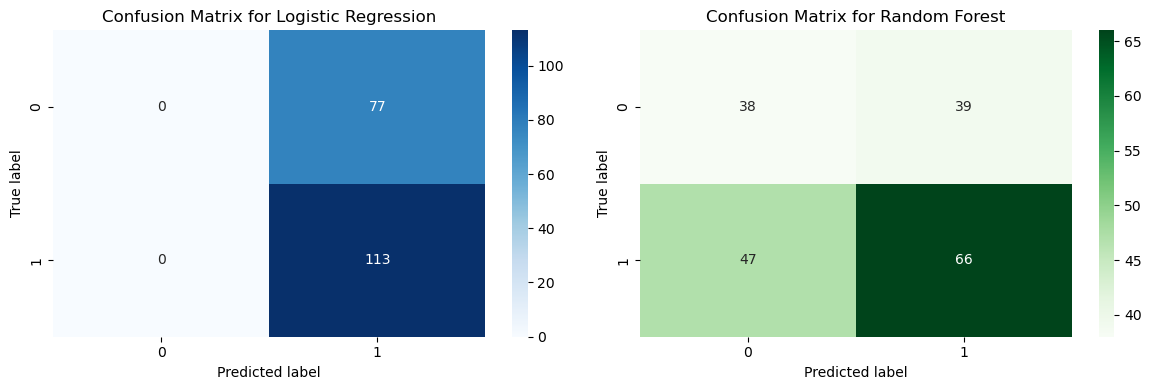

In [40]:
# Confusion matrices for logistic regression and random forest
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the heatmaps
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for Logistic Regression')
axes[0].set_ylabel('True label')
axes[0].set_xlabel('Predicted label')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix for Random Forest')
axes[1].set_ylabel('True label')
axes[1].set_xlabel('Predicted label')
plt.tight_layout()
plt.show()


### Results

- Logistic regression mode has a higher accuracy of `59%` while Random forest has `58%`. This means that the baseline model can correctly predict high-traffic recipes 70% of the time.

- The Logistic Regression model has a Recall of `1.00`, which means that it correctly identified all of the positive samples. In contrast, the Random Forest model has a lower Recall of `0.65`, indicating that it missed some of the positive samples. 

- While the Random Forest model has a higher Precision of `0.65` compared to the Logistic Regression model's Precision of `0.59`, Precision alone is not enough to determine the better model. In this case, Recall is a more important metric because we want to ensure that all positive samples are correctly identified.

Therefore, Logistic Regression model is the better model and it is correctly predicting high-traffic recipes 100% of the time.

## Evaluate by Business Metrics

**KPI for Business Monitoring:**

The primary KPI for the business to monitor the success of the Logistic Regression model in predicting high-traffic recipes is **Recall**. Recall measures the ability of the model to correctly identify positive instances (high-traffic recipes) out of all the actual positive instances, which is what the company wants.

$$\mathbf{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

- True Positives (TP) are the number of high-traffic recipes correctly predicted as high-traffic.
- False Negatives (FN) are the number of high-traffic recipes incorrectly predicted as non-high-traffic (low).

With the initial Recall value of `1.0`, the model is correctly predicting 100% of the high-traffic recipes from the existing data. Tasty Bytes can monitor the model's performance regularly by calculating the Recall metric on a predefined interval (e.g., weekly, monthly). By continuously monitoring the Recall metric over time, the business can assess the model's performance and make data-driven decisions to improve website traffic by displaying popular recipes on the homepage.


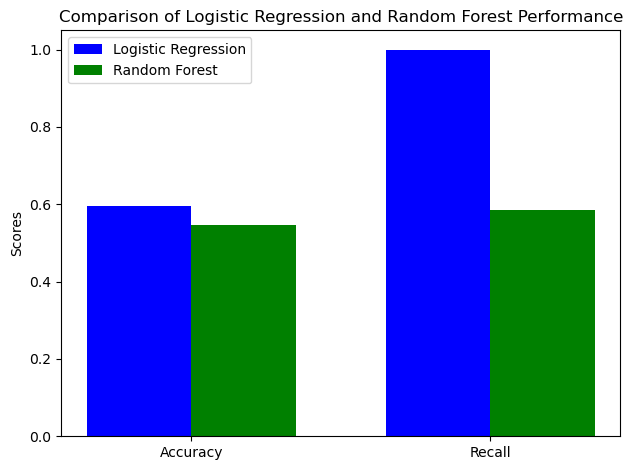

In [42]:
# Metrics for Logistic Regression
logistic_regression_metrics = {
    'Accuracy': lr_acc,
    'Recall': lr_rc,
    #'Precision': lr_pr
    #'F1 Score': lr_f1
}

# Metrics for Random Forest
random_forest_metrics = {
    'Accuracy': rf_acc,
    'Recall': rf_rc
    #'Precision': rf_pr
    #'F1 Score': rf_f1
}

# List of metrics and corresponding values for both models
metrics_list = list(logistic_regression_metrics.keys())
logistic_regression_values = list(logistic_regression_metrics.values())
random_forest_values = list(random_forest_metrics.values())

# Set the width of the bars
bar_width = 0.35

# Position of bars on x-axis
r1 = range(len(metrics_list))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, logistic_regression_values, color='b', width=bar_width, label='Logistic Regression')
plt.bar(r2, random_forest_values, color='g', width=bar_width, label='Random Forest')

plt.title('Comparison of Logistic Regression and Random Forest Performance')
plt.ylabel('Scores')
plt.xticks([r + bar_width / 2 for r in range(len(metrics_list))], metrics_list)
plt.legend()
plt.tight_layout()
plt.show()


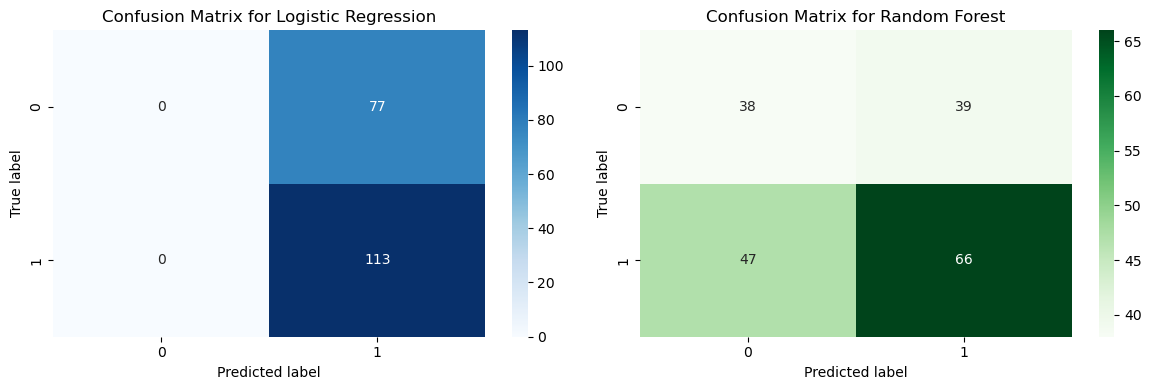

In [43]:
# Confusion matrices for logistic regression and random forest
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the heatmaps
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for Logistic Regression')
axes[0].set_ylabel('True label')
axes[0].set_xlabel('Predicted label')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix for Random Forest')
axes[1].set_ylabel('True label')
axes[1].set_xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Recommendations

We can significantly impact website traffic by using the Logistic Regression model to predict popular recipes. By continuously monitoring and improving the model's performance, the business can ensure better selection of recipes for display on the homepage, leading to increased website traffic and potential subscriptions. I would recommend the following strategies to contribute to the success of the recipe discovery platform and drive growth for Tasty Bytes in the competitive market.

1. **Model Selection**: The Logistic Regression model achieved a Recall of `100%` on the test data, meaning it can correctly identify 100% of high-traffic recipes from the total actual high-traffic recipes. Use the Logistic Regression model.

2. **Monitoring Metric**: The primary metric for monitoring the model's performance should be Recall, as it aligns with the business goal of maximizing website traffic by displaying popular recipes.

3. **Regular Evaluation**: Regularly evaluate the model's performance using new data to ensure it remains effective in identifying popular recipes. Consider retraining the model periodically to incorporate changing trends.

4. **User Engagement**: Encourage user engagement through interactive features like rating recipes, leaving comments, and sharing favorites, which can provide valuable data for model improvement.

5. **A/B Testing**: Conduct A/B testing to validate the model's impact on website traffic. Compare the performance of the model-selected recipes with other approaches to optimize homepage content.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

<center><b><i>The End!</i></b></center>